# Lab 2 - W203 - Statistics for Data Science

#### Submission by Jude Kavalam, Harshit Patel, Abhi Sharma

## Install packages

In [58]:
install.packages("dplyr")
library(dplyr)
install.packages("car")
library(car)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("corrplot")
library(corrplot)
install.packages("stargazer")
library(stargazer)
install.packages("curl")
library(curl)
install.packages("data.table")
library(data.table)
install.packages("haven")
library(haven)
install.packages("readxl")
library(readxl)
install.packages("ggplot2")
library(ggplot2)
install.packages("corrplot")
library(corrplot)
install.packages("GGally")
library(GGally)
# set standard height and width for images displayed
options(repr.plot.width=5, repr.plot.height=5)


Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'car' is in use and will not be installed"Warning message:
"package 'lmtest' is in use and will not be installed"Warning message:
"package 'sandwich' is in use and will not be installed"Warning message:
"package 'corrplot' is in use and will not be installed"Warning message:
"package 'stargazer' is in use and will not be installed"Warning message:
"package 'curl' is in use and will not be installed"Warning message:
"package 'data.table' is in use and will not be installed"Warning message:
"package 'haven' is in use and will not be installed"Warning message:
"package 'readxl' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"package 'corrplot' is in use and will not be installed"Warning message:
"package 'GGally' is in use and will not be installed"

## Data Cleaning

In [2]:
get_data = function() {
    wd = getwd()
    return (read.csv(paste(wd, "/", "crime_v2.csv", sep="")))    
}

In [3]:
data = get_data()
head(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
2,3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
3,5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
4,7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
5,9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
6,11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [4]:
dim(data)

[1] 97 25

In [5]:
sapply(data, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

#### We notice there is a factor column for prbconv, we convert this to numeric, as has been done with prbarr and prbpris

In [6]:
data$prbconv = as.numeric(data$prbconv)

In [7]:
sapply(data, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

In [8]:
# the row numbers that have atleast 1 negative value in the columns
unique(unlist (lapply (data, function (x) which (x < 0))))

integer(0)

In [9]:
# the row numbers that have atleast 1 NA value in the columns
unique(unlist (lapply (data, function (x) which (is.na (x)))))

[1] 92 93 94 95 96 97

In [10]:
data[92:97,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,2,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
# we observe all values have NA in them
# remove data where there are NA in rows
data = data[complete.cases(data), ]

In [12]:
dim(data)

[1] 91 25

## Introduction

There are 3 classes of variables provided to us:
1. Labor market variables
2. Criminal justice variables
3. Demographic variables

Both labor market and criminal justice strategies should be relevant in influencing (causing causal behavior on) crime rate. 

In our study, we are given variables that reflect both these factors:<br/>
**Variables reflecting labor markets**

10 taxpc	tax revenue per capita <br/>
15 wcon	weekly wage, construction <br/>
16 wtuc	- wkly wge, trns, util, commun <br/>
17 wtrd	- wkly wge, whlesle, retail trade <br/>
18 wfir	- wkly wge, fin, ins, real est <br/>
19 wser	- wkly wge, service industry <br/>
20 wmfg	- wkly wge, manufacturing <br/>
21 wfed	- wkly wge, fed employees <br/>
22 wsta	- wkly wge, state employees <br/>
23 wloc	- wkly wge, local gov emps <br/>

**Variables reflecting criminal justice system**

4 prbarr - 'probability' of arrest <br/>
5 prbconv - 'probability' of conviction <br/>
6 prbpris - 'probability' of prison sentence <br/>
7 avgsen - avg. sentence, days <br/>
8 polpc - police per capita <br/>
24 mix - offense mix: face-to-face/other <br/>

There is a third class of variables that represents the demographic characteristics of the data. We expect some of these variables to have a causal effect on crime rate (say pctymle or pctmin80), but others to not intrinsically have causal effects on crime rate (say west, central, county).

These variables can also possibly influence the "labor market" and "criminal justice system" variables:<br/>

**Variables reflecting demographic characteristics**

1 county - county identifier <br/>
9 density - people per sq. mile <br/>
11 west - =1 if in western N.C. <br/>
12 central - =1 if in central N.C. <br/>
13 urban - =1 if in SMSA <br/>
14 pctmin80 - perc. minority, 1980 <br/>
25 pctymle - percent young male <br/>

Our chosen target variable is "crmrate", and we're trying to understand what affects this variable (or a transform of this variable).

Note that we are choosing crime rate as our target variable with the intention to predict crime rate from the data. This is consistent with previous research that has been done

https://www.amherst.edu/media/view/121570/original/CornwellTrumbullCrime%2BElasticities.pdf

We could have argued to choose prbarr, prbconv, or prbpris as our target variables and chosen crmrate as our predictor. This is because we **CANNOT assume the direction of causality between crime rate and (say) probability of getting arrested (prbarr)**. We can argue that an increased crime rate causes an increase in probability of arrests, just as well as arguing that prbarr causes crime rate. For now, we will choose some transformation of crime rate as our target variable.

## Exploratory Data Analysis

### EDA Target Variable

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

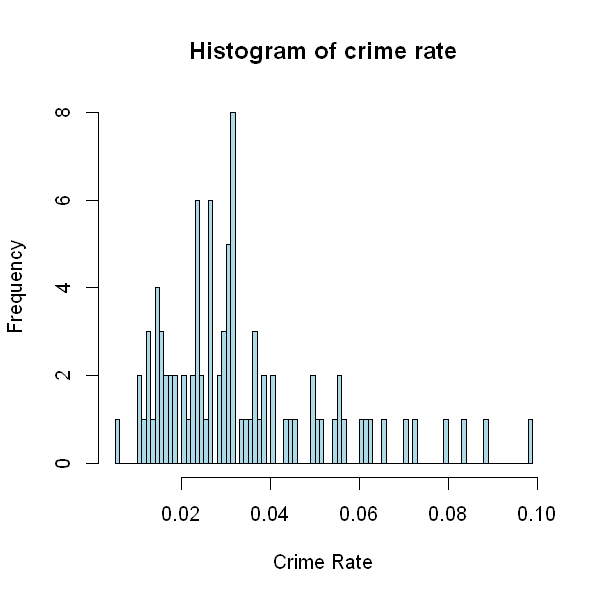

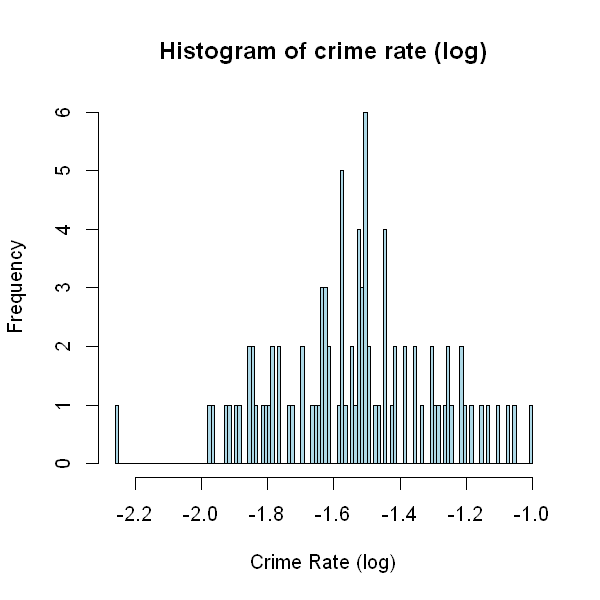

In [13]:
summary(data$crmrte)
hist(data$crmrte, breaks=100, main = "Histogram of crime rate", xlab = "Crime Rate", col = "lightblue", border = "black")
hist(log10(data$crmrte), breaks=100, main = "Histogram of crime rate (log)", xlab = "Crime Rate (log)", col = "lightblue", border = "black")

#### Note that if we take a log version of the crime rate, we get a nice normally distributed curve 

### EDA Geographical Variables (Demographic)

**One thing to consider would be to consider the effects of geography on crime rate.**

There are 3 variables which help us categorize geography - west, central and urban. These are all dummy variables that represent what region characteristics the data point has. Hence, one variable of interest could be an interaction variable: 

#### geo = west * central * urban

Note that because we include this new interaction variable, we have to include all lower order interactions as well.

We don't have a hypothesis around geography, but one can make an argument that urban areas are more susceptible for crime, given that they may be more densely populated (see graph below for plot between urban and density)

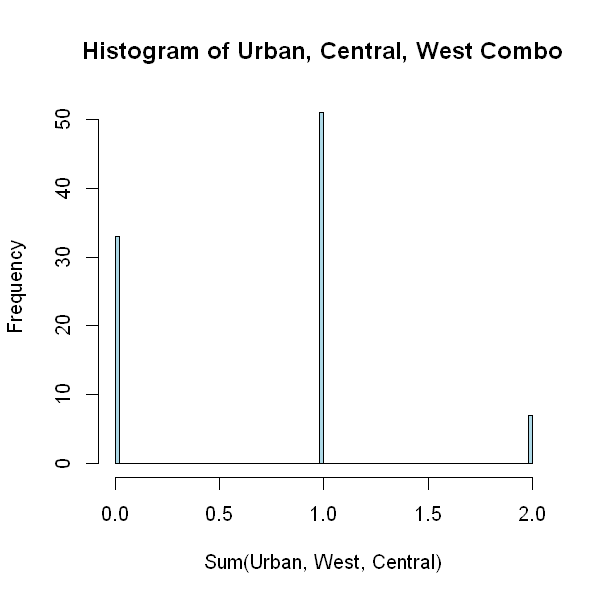

In [14]:
data$geo = data$west * data$central * data$urban
data$west_central = data$west * data$central
data$west_urban = data$west * data$urban
data$central_urban = data$central * data$urban

# also include a variable to capture non urban, non west, non central region (west=0, central=0, urban=0)
geo_arr = data$west + data$central + data$urban
hist(geo_arr, , breaks=100, main = "Histogram of Urban, Central, West Combo", xlab = "Sum(Urban, West, Central)", col = "lightblue", border = "black")
# notice there are over 30 counties that are non urban, non west, non central
data$non_urban_west_central = ifelse(geo_arr >= 1, 0, 1)

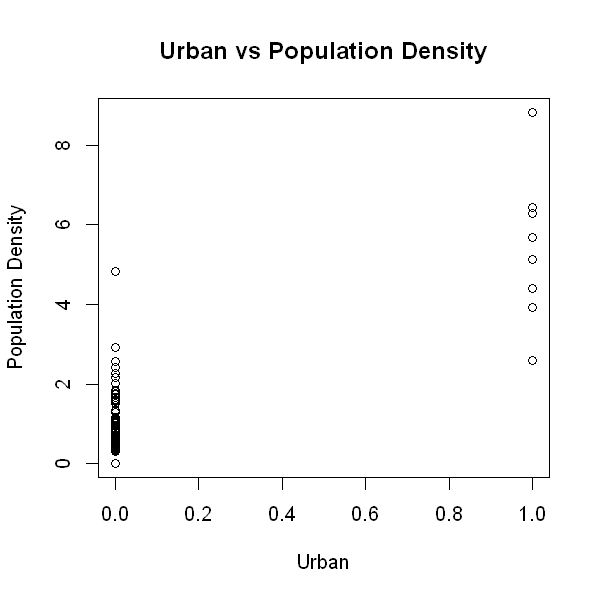

In [15]:
plot(data$urban, data$density, main = "Urban vs Population Density", xlab = "Urban", ylab = "Population Density" )

In [16]:
# sample EDA for the dummy variables
summary(data$urban)
unique(data$urban)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08791 0.00000 1.00000 

[1] 0 1

In [17]:
# Analysis of interaction term "geo"
paste("Urban:", sum(data$urban))
paste("West:", sum(data$west))
paste("Central:", sum(data$central))

paste("Central + West:", sum(data$central * data$west))
paste("Central + Urban:", sum(data$central * data$urban))
paste("Urban + West:", sum(data$urban * data$west))

paste("Urban + West + Central:", sum(data$urban * data$west * data$central))
paste("NON Urban + NON West + NON Central:", sum(data$non_urban_west_central))

[1] "Urban: 8"

[1] "West: 23"

[1] "Central: 34"

[1] "Central + West: 1"

[1] "Central + Urban: 5"

[1] "Urban + West: 1"

[1] "Urban + West + Central: 0"

[1] "NON Urban + NON West + NON Central: 33"

**For now, we will include the above variables in our model to observe if there are any special effects on crime based on geo**

### EDA Population Variables (Demographic)

We decide to add 2 interaction variables:
1. density * pctymle * 1.0 / 100 - this gives the density of young males in the county (density_ymle)
2. density * pctmin80 * 1.0 / 100 - this gives the density of minority in the county (density_min80)

**Note that this assumes that the percentage variables are unfirormly distributed over the county and that density * pct will give the density of the population of interest in the county.**

Also note that pctymle is already given in fractional terms (between 0 and 1), whereas pctmin80 is given in percentage (between 0 and 100). For sake of uniformity, we will convert pctmin80 to 0-1 scale

In [18]:
summary(data$pctmin80)
summary(data$pctymle)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.284   9.845  24.312  25.495  38.142  64.348 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06216 0.07443 0.07771 0.08396 0.08350 0.24871 

In [19]:
data$pctmin80 = data$pctmin80 * 1.0 / 100
summary(data$pctmin80)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01284 0.09845 0.24312 0.25495 0.38142 0.64348 

In [20]:
data$density_min80 = data$density * data$pctmin80 
data$density_ymle = data$density * data$pctymle

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54741 0.96226 1.42884 1.56824 8.82765 

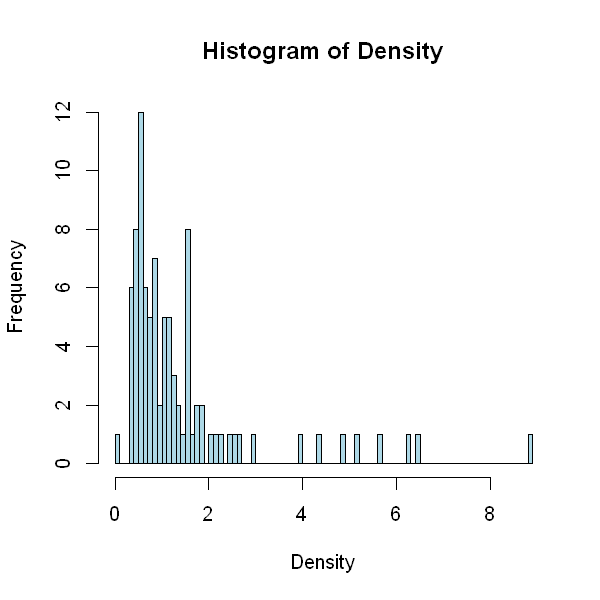

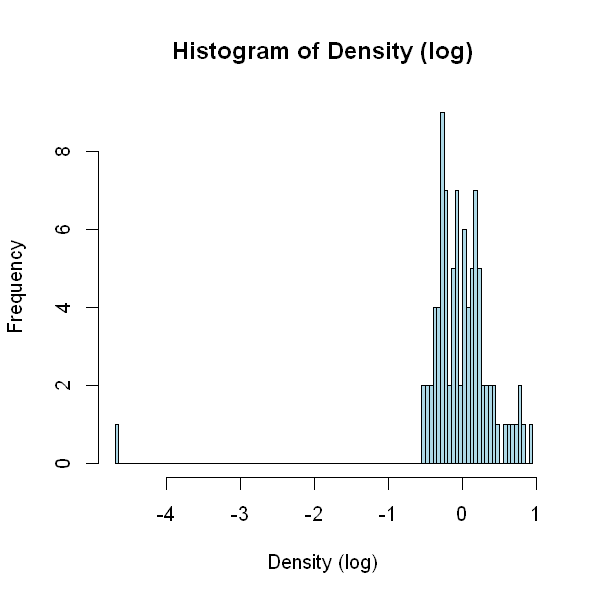

In [21]:
summary(data$density)
hist(data$density, , breaks=100, main = "Histogram of Density", xlab = "Density", col = "lightblue", border = "black")
hist(log10(data$density), , breaks=100, main = "Histogram of Density (log)", xlab = "Density (log)", col = "lightblue", border = "black")

# taking the log(Density) makes the data much more normal and is a better choice for our density variable

0.38428757,0.2021870,0.07787097,0.489824846,0.18865276
0.01966951,0.0791632,0.08260694,0.082830988,0.08643429
-0.38429614,0.0316053,0.07211538,0.013045592,0.02976677
-0.30842593,0.4791610,0.07353726,0.235535043,0.03614777
-0.26205367,0.0179619,0.07069755,0.009824232,0.03866791
-0.21371999,0.0154070,0.09891920,0.009418854,0.06047287


$r
       [,1]   [,2]   [,3] [,4]   [,5]
[1,]  1.000 -0.016 -0.095 0.29 -0.045
[2,] -0.016  1.000  0.150 0.15  0.390
[3,] -0.095  0.150  1.000 0.48  0.560
[4,]  0.290  0.150  0.480 1.00  0.880
[5,] -0.045  0.390  0.560 0.88  1.000

$p
       [,1]    [,2]    [,3]    [,4]    [,5]
[1,] 0.0000 0.88000 3.7e-01 5.2e-03 6.7e-01
[2,] 0.8800 0.00000 1.6e-01 1.7e-01 1.4e-04
[3,] 0.3700 0.16000 0.0e+00 1.4e-06 5.5e-09
[4,] 0.0052 0.17000 1.4e-06 0.0e+00 1.5e-30
[5,] 0.6700 0.00014 5.5e-09 1.5e-30 0.0e+00

$sym
              
[1,] 1        
[2,]   1      
[3,]     1    
[4,]     . 1  
[5,]   . . + 1
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


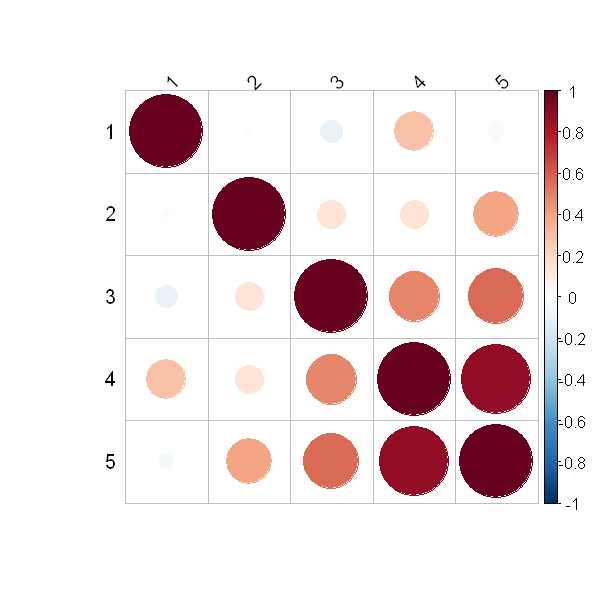

In [22]:
popdata = cbind(log10(data$density), data$pctmin80, data$pctymle, data$density_min80, data$density_ymle)
head(popdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(popdata, type="full")

#### We observe strong positive correlation between several population variables

Notably:
1. 0.39 between pctmin80 and density_ymale
2. 0.48 between pctymle and density_min80
3. 0.56 between pctymle and density_ymle
4. 0.88 between density_min80 and density_ymle

We will include these variables in our specifications with the following expected causal effects:
1. If density is high, then crime rate is expected to be high. This is simply because a larger set of people in one area is bound to create more conflict and crime in the community.
2. If percentage of young males are high in a region, we expect more crime. This is because younger people are easier to influence and may engage more in petty crimes.

There may be a concern including both density_min80 and density_ymle because they have high correlation (0.88) - leading to possible multicollinearity. This also shows that the density of younger male populations is highly correlated across counties with density of minority populations

**For now, we will include "log10(density)", "pctmin80" and one of "density_ymle" or "density_min80" variables in the model to observe their effects**

In [23]:
data$log10_density = log10(data$density)

### EDA Criminal Justice Variables

It is worthwhile to capture any relationships between these variables: prbarr, prbconv, prbpris.

This will help us determine if there is any multicollinearity between these variables. We would suspect these to be correlated

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3648  0.4234  0.4108  0.4568  0.6000 

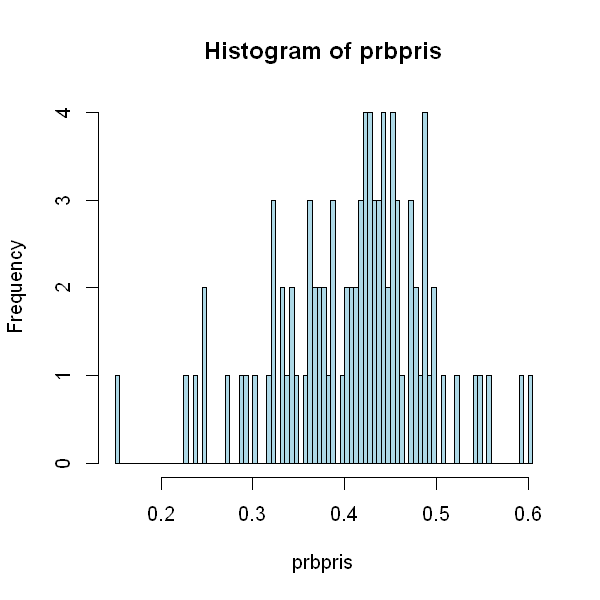

In [24]:
summary(data$prbpris)
hist((data$prbpris), breaks=100, main = "Histogram of prbpris", xlab = "prbpris", col = "lightblue", border = "black")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

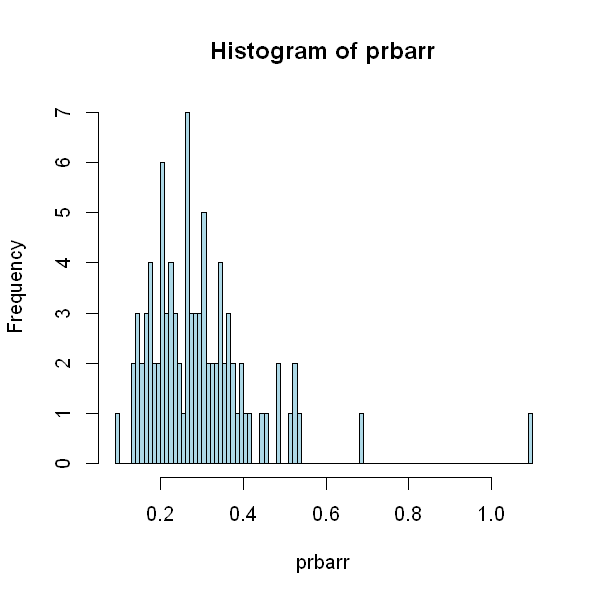

In [25]:
summary(data$prbarr)
hist((data$prbarr), breaks=100, main = "Histogram of prbarr", xlab = "prbarr", col = "lightblue", border = "black")

#### Notice that there is an outlier row with a probability higher than 1, which is not possible. We will exclude this from our analysis

In [26]:
n = unique(unlist (lapply (data, function (x) which (data$prbarr > 1))))
n

[1] 51

In [27]:
data[n,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,mix,pctymle,geo,west_central,west_urban,central_urban,non_urban_west_central,density_min80,density_ymle,log10_density
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,90,0.5,20.7,0.00905433,0.3858093,28.1931,...,0.1,0.07253495,0,0,0,0,0,0.004952441,0.02798466,-0.4136273


In [28]:
data = data[-n,]
dim(data)
# summary(data$prbarr)
# hist((data$prbarr), breaks=100, main = "Histogram of prbarr", xlab = "prbarr", col = "lightblue", border = "black")

[1] 90 33

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.25   47.50   47.28   69.75   92.00 

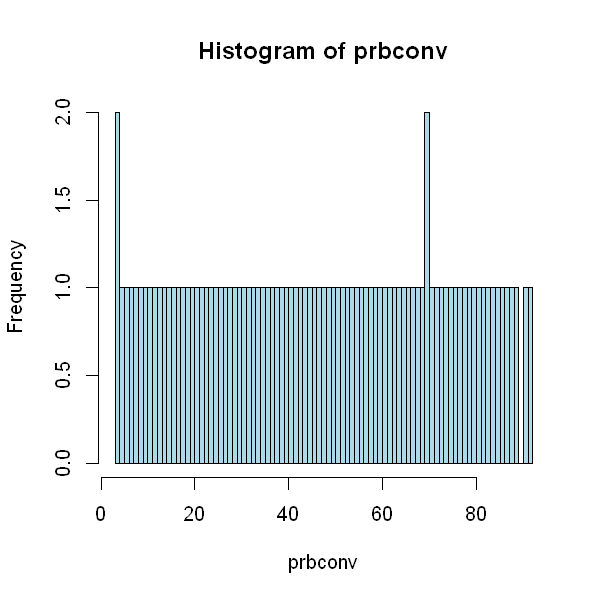

In [29]:
summary(data$prbconv)
hist((data$prbconv), breaks=100, main = "Histogram of prbconv", xlab = "prbconv", col = "lightblue", border = "black")

#### Notice that prbconv is > 1 even though it is supposed to be a probability. We believe the column is being represented as percentage.

Hence to remedy the issue, we will divide this column by 100 to get the equivalent probability

In [30]:
data$prbconv = data$prbconv * 1.0 / 100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0300  0.2525  0.4750  0.4728  0.6975  0.9200 

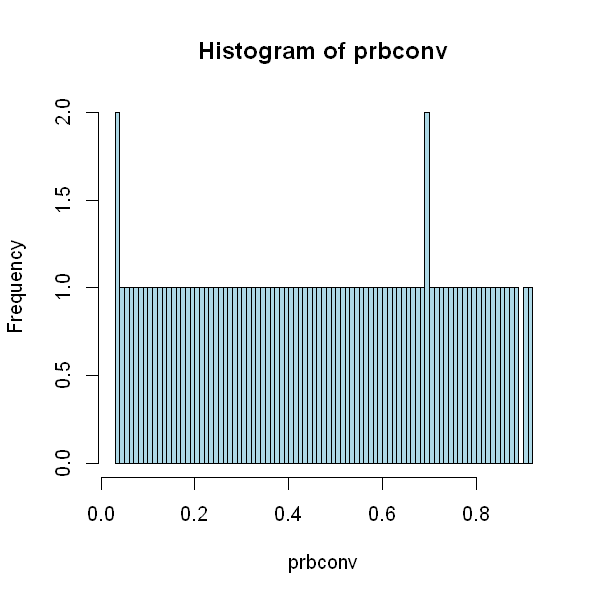

In [31]:
summary(data$prbconv)
hist((data$prbconv), breaks=100, main = "Histogram of prbconv", xlab = "prbconv", col = "lightblue", border = "black")

#### Its interesting to note that prbconv is follows an almost exact uniform distribution

#### Now that we have the data in the right format, we find correlation between the 3 probabilities, along with average sentence and police per capita

0.298270,0.63,0.436170,6.71,0.00182786
0.132029,0.89,0.450000,6.35,0.00074588
0.444444,0.13,0.600000,6.76,0.00123431
0.364760,0.62,0.435484,7.14,0.00152994
0.518219,0.52,0.442623,8.22,0.00086018
0.524664,0.03,0.500000,13.00,0.00288203


$r
       [,1]   [,2]   [,3]   [,4]   [,5]
[1,]  1.000  0.018 -0.230 -0.044 -0.270
[2,]  0.018  1.000 -0.035 -0.160 -0.075
[3,] -0.230 -0.035  1.000 -0.100 -0.120
[4,] -0.044 -0.160 -0.100  1.000  0.300
[5,] -0.270 -0.075 -0.120  0.300  1.000

$p
      [,1] [,2]  [,3]   [,4]   [,5]
[1,] 0.000 0.87 0.027 0.6800 0.0100
[2,] 0.870 0.00 0.750 0.1300 0.4800
[3,] 0.027 0.75 0.000 0.3400 0.2400
[4,] 0.680 0.13 0.340 0.0000 0.0046
[5,] 0.010 0.48 0.240 0.0046 0.0000

$sym
              
[1,] 1        
[2,]   1      
[3,]     1    
[4,]       1  
[5,]         1
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


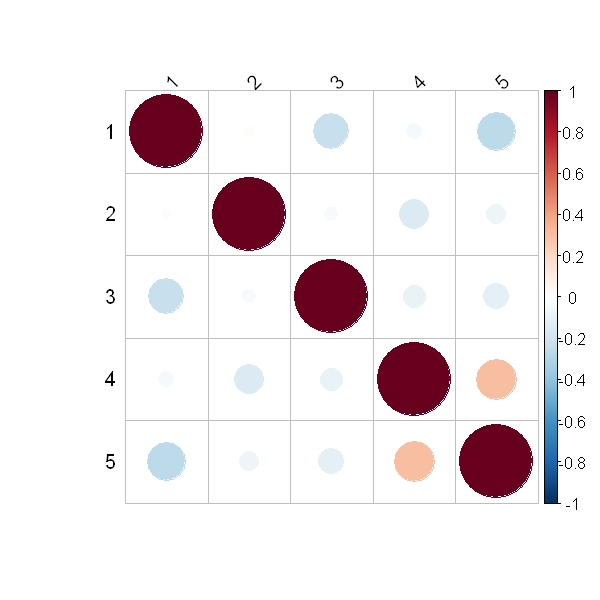

In [32]:
probdata = cbind(data$prbarr, data$prbconv, data$prbpris, data$avgsen, data$polpc)
head(probdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(probdata, type="full")

**Correlation Analysis**

1. Interestingly, there is little correlation between the probability variables, except for weak negative correlation (-0.23) between prbarr and prbpris
2. There is also weak negative correlation between prbarr and polpc (-0.27)
3. Finally, there is weak positive correlation between polpc and avgsen (0.3)

**For now, we will consider all 3 probability variables in the model**

We expect that as any of probabilities of arrest or conviction or prison sentence go up, crime rate should come down (people would be less risk taking to commit crime if they knew they would be likely arrested / convicted / imprisoned). 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.330   9.045   9.524  11.320  17.410 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012291 0.0014818 0.0016205 0.0018587 0.0044592 

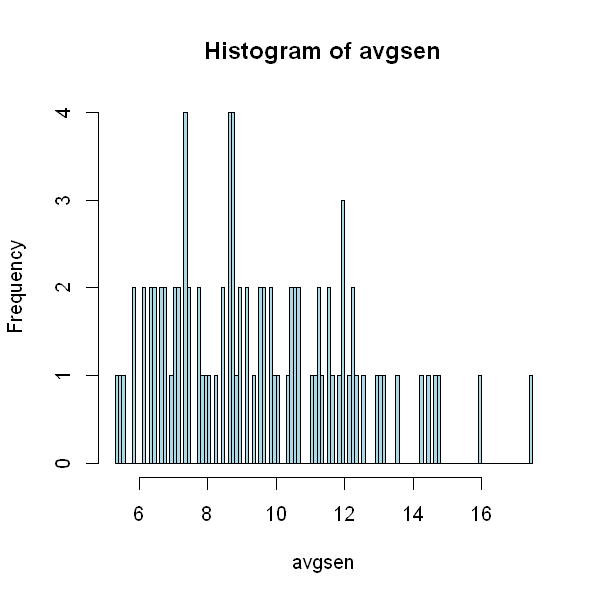

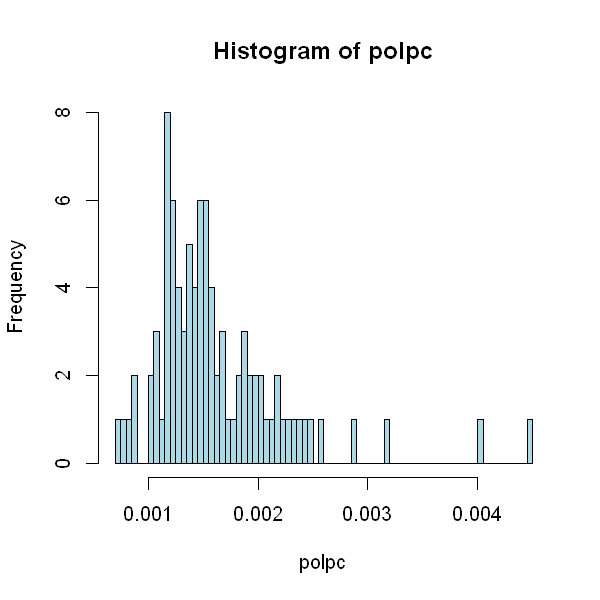

In [33]:
# Finally there's nothing special about the avgsen and polpc variables.

# They have values within range and don't display special distributions
summary(data$avgsen)
hist(data$avgsen, breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

# Taking log10(avgsen) makes the histogram look slightly more normal, but we will use avgsen as is in the model for now.
# hist(log10(data$avgsen), breaks=100, main = "Histogram of avgsen", xlab = "avgsen", col = "lightblue", border = "black")

summary(data$polpc)
hist(data$polpc, breaks=100, main = "Histogram of polpc", xlab = "polpc", col = "lightblue", border = "black")

**There seem to be a few suspicious far right outliers for police per capita and average sentence days**

We will deal with them as appropriate when evaluating the cook's distance for potential points of influence.

We cannot make a judgement for the causal effect of polpc (police per capita). If this increases, we can make an argument that crimes may go down as there is "more policing" per citizen. We can also say, if polpc goes up, then crime rate goes up (police can find trivial reasons to arrest citizens - overpolicing).

We can however, likely say, if avgsen (average sentence in days) goes up, then convicts may become may learn their lessons and not commit crimes the next time around, so crime rate decreases.

**For now, we will include both variables, as is in the model specification**

### EDA Labor Market Variables

30.99368,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91
26.89208,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47
34.81605,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37
42.94759,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03
28.05474,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82
35.22974,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22


$r
          [,1]  [,2]     [,3]  [,4]   [,5]  [,6]   [,7]  [,8]   [,9]  [,10]
 [1,]  1.00000 0.190 -0.00058 0.240 -0.027 0.170 -0.150 0.061 -0.035  0.036
 [2,]  0.19000 1.000  0.64000 0.620  0.510 0.540  0.400 0.520  0.058  0.021
 [3,] -0.00058 0.640  1.00000 0.670  0.570 0.610  0.360 0.360  0.170 -0.018
 [4,]  0.24000 0.620  0.67000 1.000  0.500 0.570  0.330 0.490  0.130  0.015
 [5,] -0.02700 0.510  0.57000 0.500  1.000 0.590  0.440 0.380  0.250 -0.016
 [6,]  0.17000 0.540  0.61000 0.570  0.590 1.000  0.320 0.420  0.240  0.085
 [7,] -0.15000 0.400  0.36000 0.330  0.440 0.320  1.000 0.450  0.170 -0.016
 [8,]  0.06100 0.520  0.36000 0.490  0.380 0.420  0.450 1.000  0.280  0.011
 [9,] -0.03500 0.058  0.17000 0.130  0.250 0.240  0.170 0.280  1.000  0.074
[10,]  0.03600 0.021 -0.01800 0.015 -0.016 0.085 -0.016 0.011  0.074  1.000

$p
       [,1]    [,2]    [,3]    [,4]    [,5]    [,6]    [,7]    [,8]   [,9]
 [1,] 0.000 8.0e-02 1.0e+00 2.4e-02 8.0e-01 9.9e-02 1.5e-01 5.7e-01 0.7500
 [2,] 0

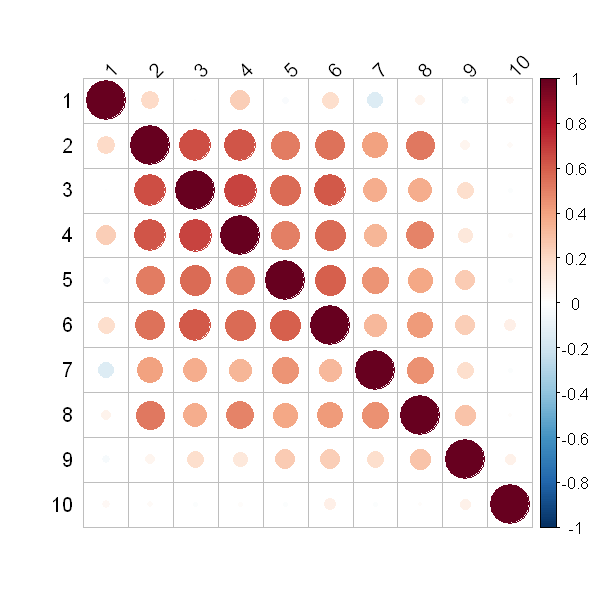

In [34]:
labmktdata = cbind(data$taxpc, data$wcon, data$wtuc, data$wtrd, data$wfir, data$wser, data$wmfg, data$wfed, data$wsta, data$wloc)
head(labmktdata)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(labmktdata, type="full")


As expected, due to labor and market interdependencies, a lot of the wages of workers in the city are correlated with others.

Note that while there is strong positive correlation (> 0.6), there is no perfect multicollinearity amongst these variables

Tax revenues are hardly correlated with any of the wages, this is a little surprising! Although we do see weak correlation between taxes and certain industries.

From this article: https://www.amherst.edu/media/view/121570/original/CornwellTrumbullCrime%2BElasticities.pdf

We find that these variables of wage represent **average** weekly wages of the industry

One variable of interest could be the total weekly wages:

**wtotal = wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc**

The argument is that if the total average weekly wages are high for a county, then the crime rate will be low (as the county is prosperous, so robberies and money related crimes would be fewer)

One may wonder if its valid to add wages and include this in the model. There are a few arguments for doing this:
1. Adding all wages shouldnt affect the regression because its the same effect as a linear combination of the betas of the individual industrial wages. In other words, the coefficient of wtotal is an aggregated version of the effect of each of the coefficients of the wage variables.
2. Adding all wages gives an idea of the overall economic condition of the county, which would affect crime rate of the county on aggregate
3. Even if wages in 1 county were not distributed evenly amongst sectors (on average), then due to local county tax policies, higher wage workers can be taxed more to provide services and benefit to the poorer wage workers in the county. If poor wage earners are now taken care of with the wealth and services from the government, there may be lesser incentive for crime in the county. This hypothesis is admittedly a little imaginative, but is plausible in theory. 

There are a few caveats with this variable though:
1. Total average weekly wage in a county, while succinct, may be a controversial variable to include because individual wages are aggregated into a single number and may be hiding the effects of each individual industry. For example, consider wcon, wfir and wmfg variables. If in county1, the values are 100, 200, 300 and in county2, the values are 1, 2, 597. wtotal is the same for both counties, however, the breakdown shows that the workforce in county2 is on average poorer than county1, and thus susceptible to crime. 


In [35]:
data$wtotal = data$wcon + data$wtuc + data$wtrd + data$wfir + data$wser + data$wmfg + data$wfed + data$wsta + data$wloc

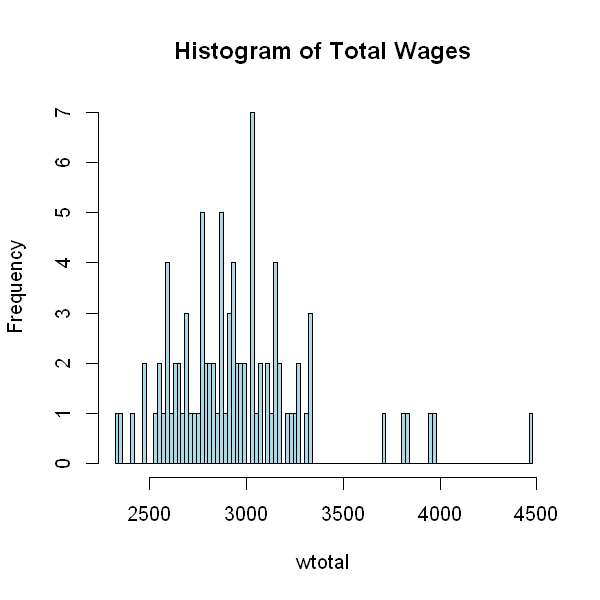

In [36]:
# upon closer inspection of the weekly wages, most wages seem to follow the expected normal dist
# except for wser, which has one extreme positive outlier
# hist(data$wloc, breaks=100, main = "Histogram of wloc", xlab = "wloc", col = "lightblue", border = "black")

# we see that wtotal has a few outliers but nothing too concerning
hist(data$wtotal, breaks=100, main = "Histogram of Total Wages", xlab = "wtotal", col = "lightblue", border = "black")

[1] 0.2369857

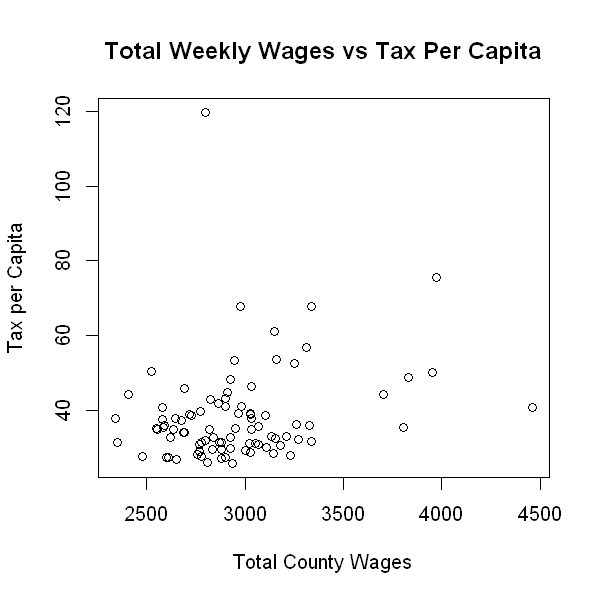

In [37]:
plot(data$wtotal, data$taxpc, main = "Total Weekly Wages vs Tax Per Capita", xlab = "Total County Wages", ylab = "Tax per Capita")
cor(data$wtotal, data$taxpc)

The graphs above show that total county wages are weakly correlated with taxpc (0.23).

Total weekly wages is not unreasonably skewed in distribution (except for 5 outliers). More or less, each wage variable follows a normal distribution (as expected for population wages). **Hence, it is reasonable to use wtotal in our model.**

## Assumptions of Multiple Linear Regression

1. Parameters are linear
2. No perfect multicollinearity
3. IID / Random sample of observations in dataset
4. Zero conditional mean, ie, E[u|X] = 0 (or weaker assumption of exogeneity, E(u) = 0 and Cov(X, u) = 0)
5. Homoskedastic errors, Var(u|X) = const
6. Normality of errors ~ N(0, sigma^2)

MLR 1-4 implies unbiased OLS estimators (beta coefficients) <br/>
MLR 1-5 (Gauss markov) implies OLS estimators are BLUE <br/>
MLR 1-6 (Classical LM assumptions) implies OLS estimators, ie, beta_j ~ N(beta_j, var(beta_j)) - var(beta_j) given by white standard errors

## Model Building

Our target variable is log10(crmrate) - which is a scaled version of the log of crime rate. This gives us percentage increase of crime rate

In [38]:
data$y = log10(data$crmrte)

We will build 8 model specifications that consist of one or more **classes** of variables:

1. Model1: Demographic + Criminal Justice + Labor Market variables
2. Model2: Demographic + Criminal Justice variables
3. Model3: Demographic + Labor Market variables
4. Model4: LaborMarket + Criminal Justice variables
5. Model5: LaborMarket variables
6. Model6: Criminal Justice variables
7. Model7: Demographic variables
8. Model8: Select variables our team thinks are important causes

**We will use Adjusted R-Squared, AIC, BIC for criteria of model fit**

In [39]:
dim(data)

[1] 90 35

### Demographic Variables Considered

**Geo variables**

1. geo
2. west_central
3. west_urban
4. central_urban
5. central
6. west
7. urban
8. non_urban_west_central

**Population variables**

9. log10_density
10. density_ymle
11. pctmin80

### Criminal Justice Variables Considered

All variables listed in the criminal justice category are considered without transformation
1. prbarr
2. prbconv
3. prbpris
4. avgsen
5. polpc

### Labor Market Variables Considered

1. wtotal
2. taxpc

Note that we have already run our models before and determined that one row (with ID 78) introduces very strong outlier tendencies, and has very strong influence (large cook's distance). **We will eliminate this row from consideration** because this single row has caused coefficients that were originally significant to become insignificant in on our previous model runs.

In [42]:
outlier_row = 78
data[outlier_row, ]
dim(data)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,geo,west_central,west_urban,central_urban,non_urban_west_central,density_min80,density_ymle,log10_density,wtotal,y
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,173,87,0.0139937,0.530435,0.21,0.15,6.64,0.00316379,2.03422e-05,37.72702,...,0,0,0,0,0,5.165169e-06,1.518075e-06,-4.691602,2338.455,-1.854067


[1] 90 35

In [43]:
data = data[-outlier_row, ]
dim(data)

[1] 89 35

In [44]:
model1_all = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + non_urban_west_central + log10_density + density_ymle + pctmin80 + prbarr + prbconv + prbpris + avgsen + polpc + wtotal + taxpc, data=data)

model2_dem_cj = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + non_urban_west_central + log10_density + density_ymle + pctmin80 + prbarr + prbconv + prbpris + avgsen + polpc, data=data)

model3_dem_lbmkt = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + non_urban_west_central + wtotal + taxpc, data=data)

model4_cj_lbmkt = lm(y ~ prbarr + prbconv + prbpris + avgsen + polpc + wtotal + taxpc, data=data)

model5_lbmkt = lm(y ~ wtotal + taxpc, data=data)

model6_cj = lm(y ~ prbarr + prbconv + prbpris + avgsen + polpc, data=data)

model7_dem = lm(y ~ geo + west_central + west_urban + central_urban + central + west + urban + non_urban_west_central + log10_density + density_ymle + pctmin80, data=data)

model8_select = lm(y ~ prbarr + prbconv + polpc + log10_density + pctmin80 + density_ymle, data=data)

In [45]:
# set model to be evaluated here

model = model8_select

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.398401 -0.062465  0.007159  0.000000  0.092871  0.296697 


	Shapiro-Wilk normality test

data:  m$residuals
W = 0.97446, p-value = 0.07619



	studentized Breusch-Pagan test

data:  m
BP = 20.663, df = 6, p-value = 0.002109


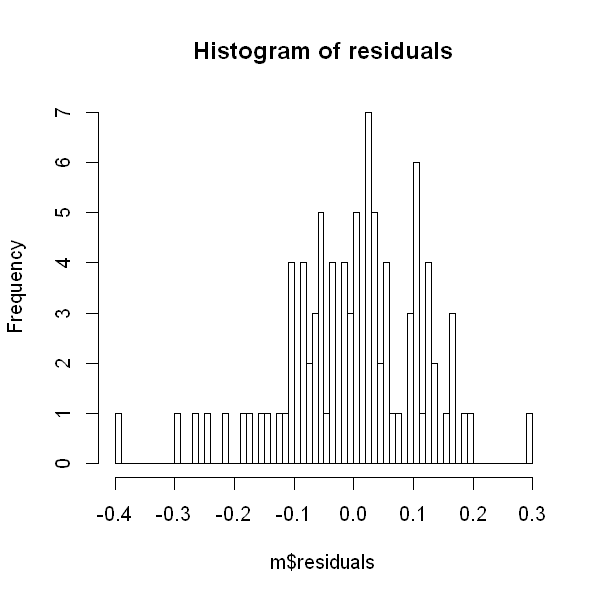

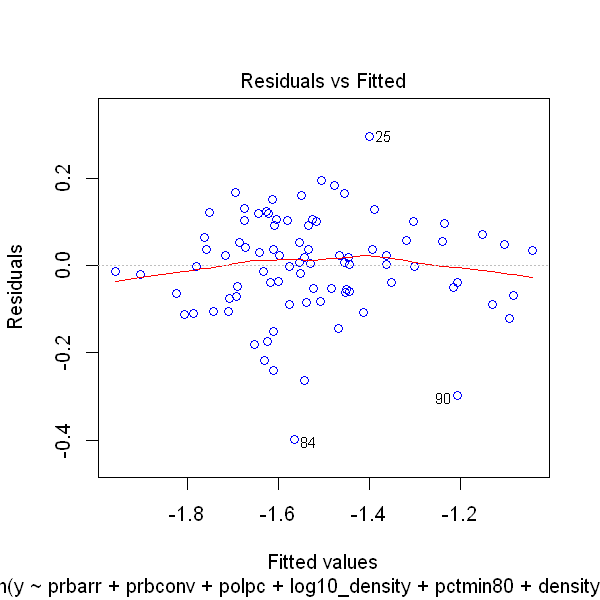

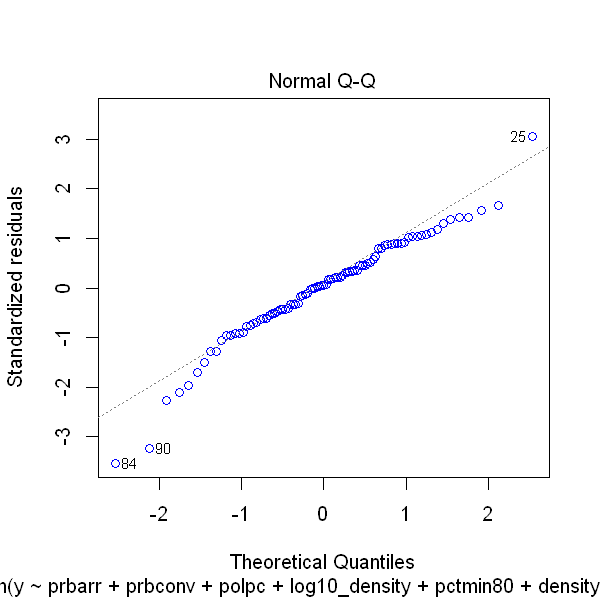

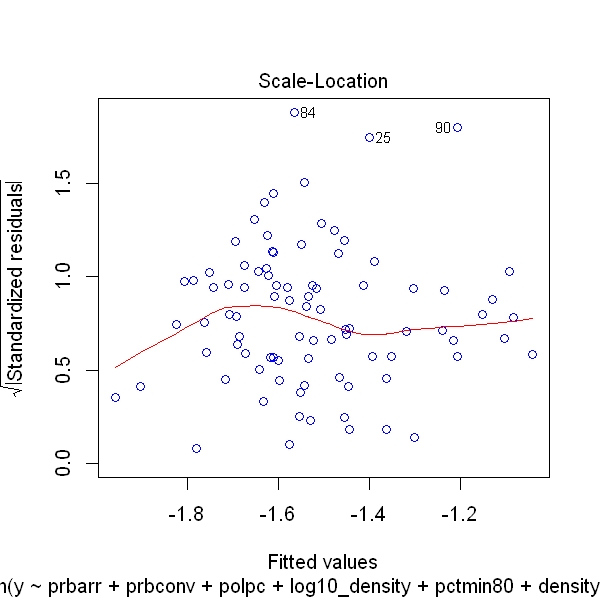

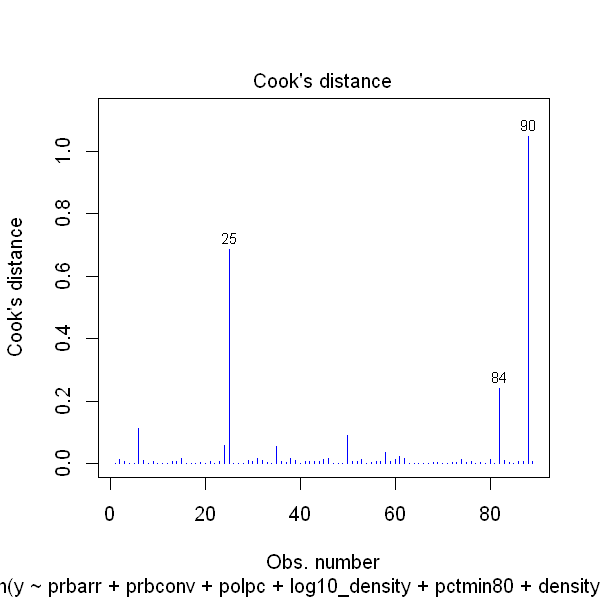

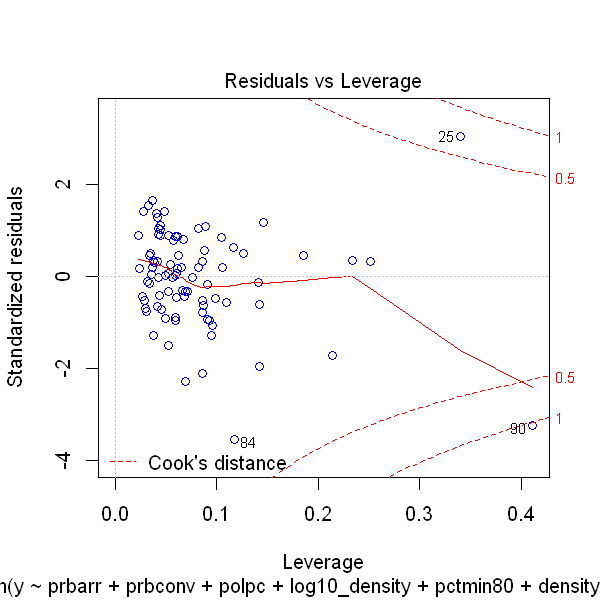

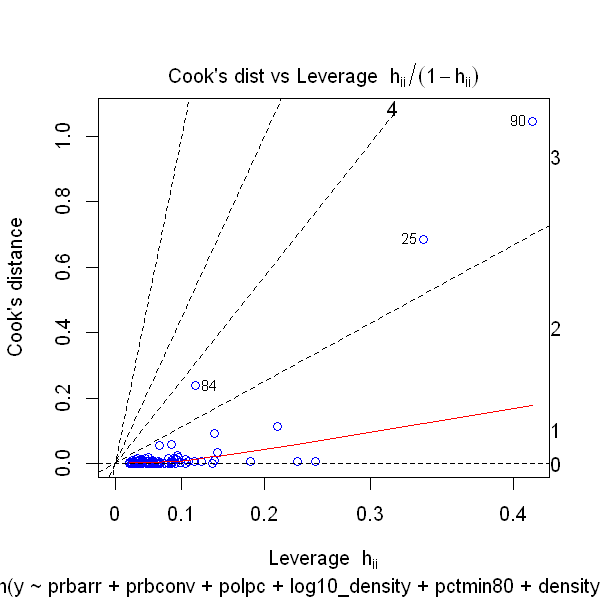

In [46]:
# We have kept all models linear in beta coefficients (MLR 1 satisfied for all models)
# Note that we assume data has been collected as IID (MLR 3 for all models)
evaluate_model_shapiro = function(m) {
    paste("Shapiro test on residuals - test for normality (MLR 6)")
    # null hypothesis is residuals are normally distributed
    shapiro.test(m$residuals)
}

evaluate_model_bp = function(m) {
    paste("Breusch Pagan test - test for heteroskedasticity (MLR 5)")
    # null hypothesis is homoskedasticity, alt is presence of heteroskedasticity
    bptest(m)
}


evaluate_model_plots = function(m) {

    paste("Plotting residuals - test for normality of errors (MLR 6)")
    hist(m$residuals, breaks=50, main = "Histogram of residuals")

    paste("Diagnostic plots (MLR 4,5 - Residual vs fitted), (MLR6 - QQ Plot), (MLR5 - Std. Residuals), (Cooks Dist - Outliers test)")
    #par(mfrow=c(3,3))
    plot(m, which=1:6, col = 'blue')
    
}

summary(model$residuals)
evaluate_model_shapiro(model)
evaluate_model_bp(model)
evaluate_model_plots(model)

In [47]:
# Always use heteroskedasticity robust std errors for beta values
# Get the coefficients for the variables in the model
coeftest(model, vcov = vcovHC)
summary(model)
AIC(model)
BIC(model)


t test of coefficients:

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)   -1.51376    0.14879 -10.1736 3.392e-16 ***
prbarr        -0.56750    0.16801  -3.3778 0.0011197 ** 
prbconv       -0.25441    0.09286  -2.7397 0.0075434 ** 
polpc         84.31976   76.67996   1.0996 0.2747103    
log10_density  0.37450    0.10178   3.6796 0.0004166 ***
pctmin80       0.53876    0.10498   5.1319 1.890e-06 ***
density_ymle  -0.10247    0.18799  -0.5451 0.5871776    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Call:
lm(formula = y ~ prbarr + prbconv + polpc + log10_density + pctmin80 + 
    density_ymle, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39840 -0.06247  0.00716  0.09287  0.29670 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.51376    0.08237 -18.378  < 2e-16 ***
prbarr        -0.56750    0.14436  -3.931 0.000176 ***
prbconv       -0.25441    0.05889  -4.320 4.34e-05 ***
polpc         84.31975   24.37653   3.459 0.000863 ***
log10_density  0.37450    0.08599   4.355 3.82e-05 ***
pctmin80       0.53876    0.08178   6.588 3.99e-09 ***
density_ymle  -0.10247    0.21082  -0.486 0.628216    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1199 on 82 degrees of freedom
Multiple R-squared:  0.7341,	Adjusted R-squared:  0.7146 
F-statistic: 37.72 on 6 and 82 DF,  p-value: < 2.2e-16


[1] -116.2017

[1] -96.29266

$r
         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]
[1,]  1.0e+00  4.2e-01  4.0e-01 -2.5e-01 -3.4e-17 -2.0e-01 -7.1e-02
[2,]  4.2e-01  1.0e+00  8.8e-01 -2.8e-01 -1.1e-17 -3.5e-01 -2.0e-01
[3,]  4.0e-01  8.8e-01  1.0e+00 -3.4e-01 -1.8e-17 -3.5e-01 -5.7e-02
[4,] -2.5e-01 -2.8e-01 -3.4e-01  1.0e+00 -8.4e-20 -2.1e-01  1.2e-01
[5,] -3.4e-17 -1.1e-17 -1.8e-17 -8.4e-20  1.0e+00  4.2e-17  2.1e-17
[6,] -2.0e-01 -3.5e-01 -3.5e-01 -2.1e-01  4.2e-17  1.0e+00  1.9e-01
[7,] -7.1e-02 -2.0e-01 -5.7e-02  1.2e-01  2.1e-17  1.9e-01  1.0e+00

$p
        [,1]    [,2]    [,3]   [,4] [,5]    [,6]  [,7]
[1,] 0.0e+00 5.0e-05 8.3e-05 0.0170    1 0.05700 0.510
[2,] 5.0e-05 0.0e+00 1.6e-29 0.0084    1 0.00067 0.065
[3,] 8.3e-05 1.6e-29 0.0e+00 0.0012    1 0.00089 0.600
[4,] 1.7e-02 8.4e-03 1.2e-03 0.0000    1 0.04300 0.270
[5,] 1.0e+00 1.0e+00 1.0e+00 1.0000    0 1.00000 1.000
[6,] 5.7e-02 6.7e-04 8.9e-04 0.0430    1 0.00000 0.072
[7,] 5.1e-01 6.5e-02 6.0e-01 0.2700    1 0.07200 0.000

$sym
   

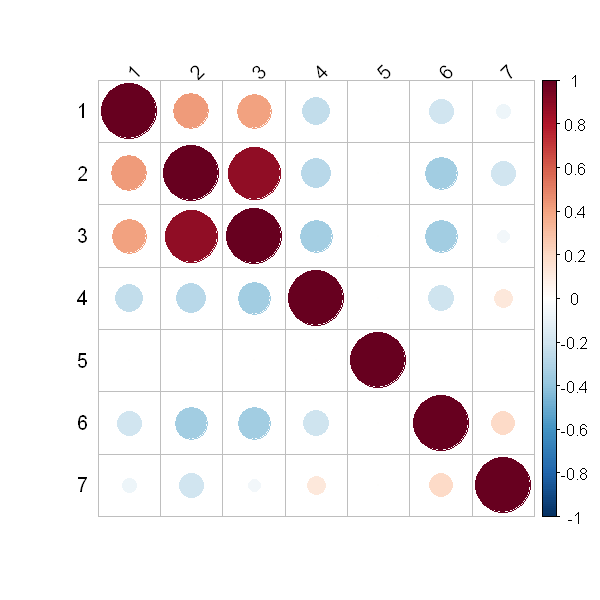

In [48]:
exodata = cbind(model$residuals, data$prbarr, data$prbconv, data$polpc, data$log10_density, data$pctmin80, data$density_ymle)
source("http://www.sthda.com/upload/rquery_cormat.r")
rquery.cormat(exodata, type="full")

### Causality Criteria

We notice that the residuals mean is 0.
We also notice that the correlation between the residuals and the model variables is NOT 0 for all variables (see first row in the above correlation matrix plot). 

We see
1. Positive correlation between residuals and prbarr 
2. Positive correlation between residuals and prbconv
3. Negative correlation between residuals and polpc
4. Negative correlation between residuals and pctmin80

**Hence, we CANNOT say that the exogeneity assumption is satisfied and hence, the effect of our model specification is associative and NOT causal**

TODO: We will fix our variables in phase 3 of the lab to try to prove exogeneity and hence, prove a causal relationship

### Model Analysis

We notice that we have coefficients and std. errors from heteroskedastic robust methods (White-Huber)

We also have our regular std. errors from the summary command.

**Note that the Breusch Pagan test shows presence of heteroskedasticity, hence, we cannot rely on the coefficients from the summary command**

We notice there are a few factors that affect crime rate percentage (target is log(crmrate)):
1. **Probability of Arrest (prbarr)** - this is fairly obvious. It has a negative coefficient, meaning that when probability of arrest goes up, crime rate percentage goes down - likely because criminals reconsider doing the crime, when they know they have a high chance of getting arrested. This variable is significant in both methods of coefficient calculation.
2. **Probability of Conviction (prbconv)** - this also follows similar logic to prbarr. Its coefficient is also negative and significant in both methods of calculation
3. **Percentage of Minority (pctmin80)** - the model shows that as minorities increase in a county, so does crime. This variable is significant in both modes of coefficient calculation. What may be an interesting discussion is to find out whether the minorities are victims of crime, thus leading to higher crime rate OR are minorities the perpetrators of crime, thus leading to higher crime rate?
4. **Density (log10_density)** - as density goes up, crime rate goes up. This is consistent with our originally stated hypothesis - crowded regions have more chance for conflict and more chance of crime.

Its interesting to note that polpc is a significant variable in our summary output, but NOT significant in the heteroskedastic robust standard error coefficient calculation.


Model fit metrics are looking good. Adjusted R squared is around 71% and AIC / BIC scores are negative (interesting to note).

Meaning of negative AIC or BIC: 

https://www.reddit.com/r/AskStatistics/comments/5ydt2c/if_my_aic_and_bic_are_negative_does_that_mean/
https://stat.ethz.ch/pipermail/r-help/2005-April/069550.html

In [55]:
# finally plot the models and compare models with stargazer 
se_model8 = sqrt(diag(vcovHC(model8_select)))
se_model6 = sqrt(diag(vcovHC(model6_cj)))
stargazer(model8_select, model6_cj, type = "text", omit.stat = "f",
         se = list(se_model8, se_model6),
         star.cutoffs = c(0.05, 0.01, 0.001))


                          Dependent variable:      
                    -------------------------------
                                   y               
                          (1)             (2)      
---------------------------------------------------
prbarr                 -0.568***       -0.736**    
                        (0.168)         (0.267)    
                                                   
prbconv                -0.254**         -0.308*    
                        (0.093)         (0.123)    
                                                   
prbpris                                 -0.023     
                                        (0.289)    
                                                   
avgsen                                  -0.009     
                                        (0.008)    
                                                   
polpc                   84.320         151.755*    
                       (76.680)        (68.537)    
           

We decided to compare the criminal justice only model (model6_cj) against the selected model chosen by the team (model8_select).

We did this because its a fair comparison between 2 models, as we observe that most of our explanatory variables were criminal justice related variables.

We notice that our model has a superior adjusted R-Squared value (71% vs 42%). We also notice that the criminal justice only model has polpc as a significant variable, which is not significant in our selected model.

### MLR assumptions for Select Model 8
1. **MLR 1 - linear in parameters** is automatically satisfied for all models.
2. There is **no PERFECT multicollinearity** in the data as we have omitted variables that could have potentially shown high correlation. **Hence MLR 2 is also satisfied.**
3. The data is assumed to be collected as IID (this can be assumed from the study). **Hence, MLR 3 criteria is satisfied.**
4. Looking at the residuals vs fitted values plot, **MLR 4 (Zero Conditional mean) is satisfied.** The zero conditional mean line does slope downwards on extremities, however, this could be due to lack of sufficient data points.
5. The Breusch Pagan test shows us that the variance of errors is NOT homoskedastic (at the 95% signifcance level). This is also confirmed from the std. residuals plot (we do see a cone shape formation for the scatterplot). **This shows us that MLR 5 (homoskedasticity) is NOT satisfied.** We will address this as part of phase 3 of the lab.
6. The QQ norm plot and residual histogram plot for errors shows that errors do follow an approximate normal distribution. We also calculate the mean of errors to show that we have zero residual mean. However, there are some clear outliers represented in the data (skewed towards the lower end). **This shows that MLR 6 (normality of errors) is also satisfied.**
7. Because we have 90 data points (> 30), we can rely on the **law of asymptotics (CLT)** to say that even if MLR 6 is not completely satisfied, the coefficients are normally distributed with unbiased true population parameter value as mean and variance given by White-Huber standard errors, ie, betaj_hat ~ N(beta_j, var(beta_j)). 

### Outliers
1. We notice that there are a few outliers in our data, given by data points in rows 25, 84, 90
2. These also show up in the QQ plot as well as the Cooks distance plot (having cook's dist close to 1). However, we will include these in our model because its not much larger than 1.
3. **Note that we removed row 79 which had an extremely large cook's distance and was causing problems in the model.**

### Omitted Variables

We pick 3 county wide variables as omitted variables:
1. Drug_Pct - the percentage of people in the county using drugs
2. Unemployment_Pct - the percentage of unemployed people
3. Education_Years - the average number of years of education in the county

We expect Drug_Pct to be positively correlated with crime rate.
We expect Unemployment_Pct to be positively correlated with crime rate.
We expect Education_Years to be negatively correlated with crime rate.

For the omitted variable bias, we need to consider our modified beta values:

betaj_hat = betaj_pop + beta_omitted * delta

where betaj_hat is off from the population betaj by a factor of **beta_omitted * delta** 

**Let us say our jth variable is prbarr**

In the case of (say) Education_Years, 
1. beta_omitted is negative (Education_Years should be negatively correlated with crime rate) 
2. delta is negative (prbarr should be negatively correlated with Education_Years)

Hence, beta_omitted * delta is positive. Hence, betaj_hat is larger than betaj_pop. This means that we have **overestimated the effect of prbarr by omitting Education_Years from our model**. If Education_Years was included, then prbarr coefficient would have been smaller in absolute value terms.

## Appendix



Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"

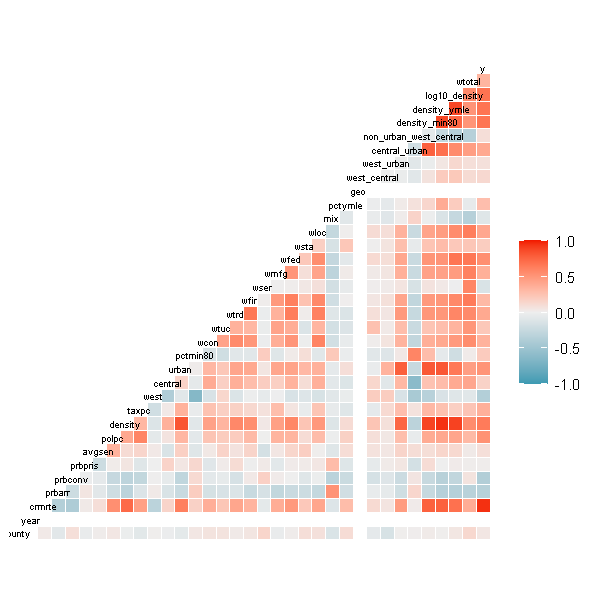

In [51]:
ggcorr(data, size = 2)